<a href="https://colab.research.google.com/github/Adityatiwari27/css/blob/main/diabetespredictionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci.csv


In [ ]:
import pandas as pd
df=pd.read_csv('heart_disease_uci.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
null_values=df.isnull()
print(null_values)


        id    age    sex  dataset     cp  trestbps   chol    fbs  restecg  \
0    False  False  False    False  False     False  False  False    False   
1    False  False  False    False  False     False  False  False    False   
2    False  False  False    False  False     False  False  False    False   
3    False  False  False    False  False     False  False  False    False   
4    False  False  False    False  False     False  False  False    False   
..     ...    ...    ...      ...    ...       ...    ...    ...      ...   
915  False  False  False    False  False     False  False  False    False   
916  False  False  False    False  False     False  False  False    False   
917  False  False  False    False  False     False  False  False    False   
918  False  False  False    False  False     False  False  False    False   
919  False  False  False    False  False     False  False  False    False   

     thalch  exang  oldpeak  slope     ca   thal    num  
0     False  Fals

In [ ]:

data = df.fillna(method='ffill')

print(data)


      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina     127.0  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic     122.0  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

<Axes: >

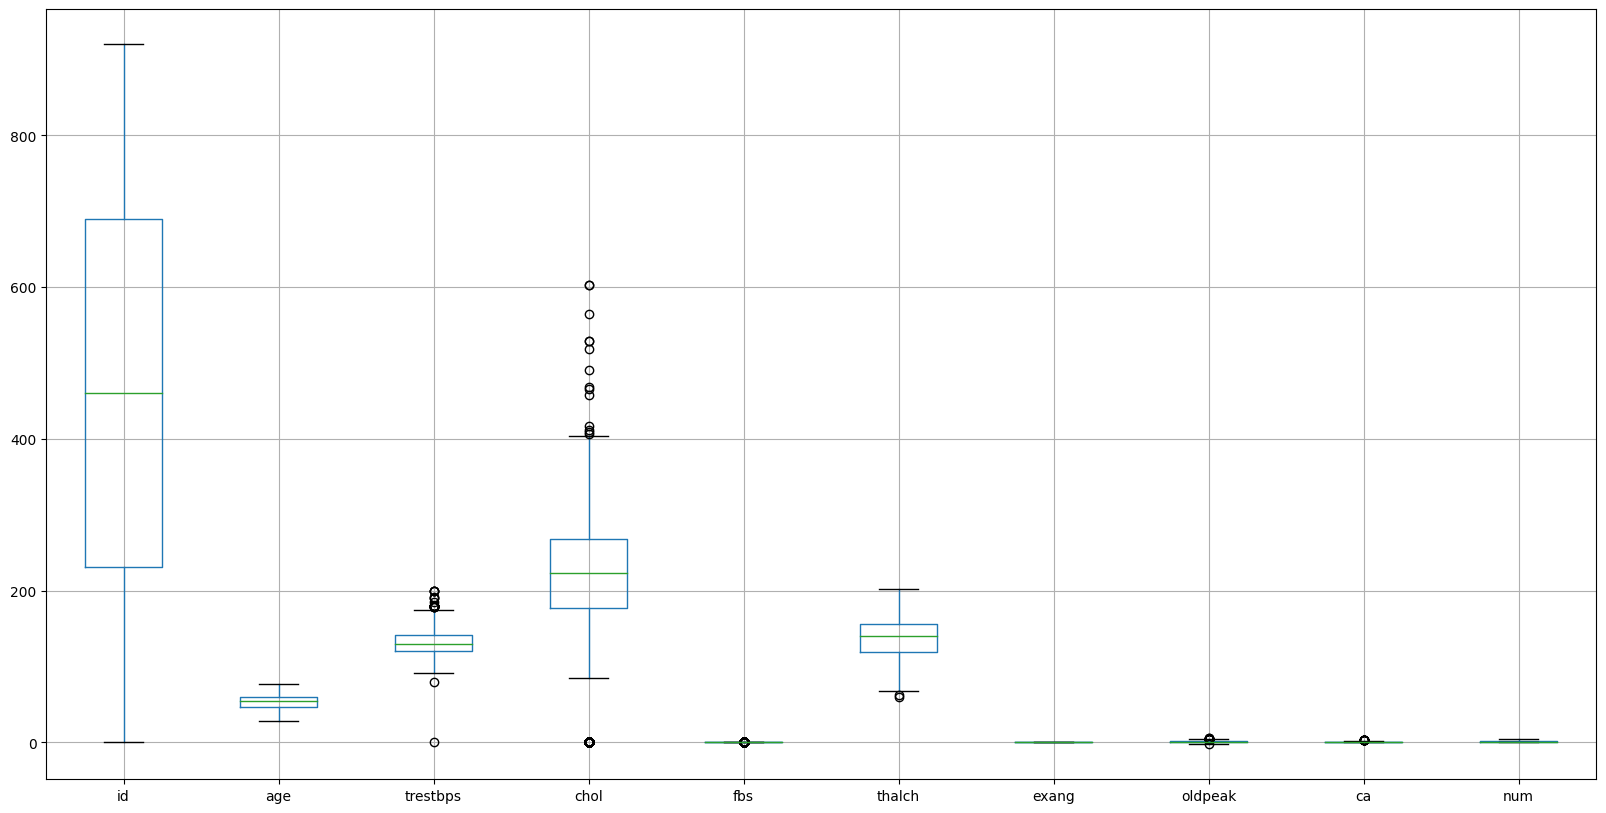

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data.boxplot()

In [ ]:
df = pd.DataFrame(data)

def remove_outliers(df):
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    mask = pd.Series([True] * len(df), index=df.index)  # Initialize a mask with all True values

    # Calculate and apply the bounds for each numeric column
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask &= (numeric_df[col] >= lower_bound) & (numeric_df[col] <= upper_bound)

    # Apply the mask to filter the original DataFrame
    filtered_df = df[mask]
    return filtered_df

filtered_df = remove_outliers(df)

# Separate non-numeric columns
non_numeric_df = df.select_dtypes(exclude=['number'])

# Combine the filtered numeric data with the non-numeric data
result_df = filtered_df[numeric_df.columns].join(non_numeric_df)

print("Original Data:\n", df)
print("\nFiltered Data:\n", result_df)

Original Data:
       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina     127.0  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic     122.0  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

           

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and non-numeric columns
numeric_df = filtered_df.select_dtypes(include=['number'])
non_numeric_df = filtered_df.select_dtypes(exclude=['number'])

# Normalize the numeric columns using Min-Max scaling
scaler = MinMaxScaler()
normalized_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns, index=numeric_df.index)

# Combine the normalized numeric data with the non-numeric data
normalized_df = normalized_numeric_df.join(non_numeric_df)
print(normalized_df)

           id       age  trestbps      chol    thalch   oldpeak   ca   num  \
0    0.000000  0.714286  0.646341  0.463950  0.603053  0.638889  0.0  0.00   
2    0.002176  0.795918  0.341463  0.451411  0.442748  0.722222  1.0  0.25   
3    0.003264  0.183673  0.463415  0.517241  0.885496  0.972222  0.0  0.00   
4    0.004353  0.265306  0.463415  0.373041  0.770992  0.388889  0.0  0.00   
5    0.005441  0.571429  0.341463  0.473354  0.816794  0.222222  0.0  0.00   
..        ...       ...       ...       ...       ...       ...  ...   ...   
915  0.995647  0.530612  0.426829  0.777429  0.633588  0.000000  0.0  0.25   
916  0.996736  0.693878  0.426829  0.169279  0.633588  0.000000  0.0  0.00   
917  0.997824  0.551020  0.365854  0.432602  0.221374  0.000000  0.0  0.50   
918  0.998912  0.612245  0.365854  0.940439  0.221374  0.000000  0.0  0.00   
919  1.000000  0.693878  0.341463  0.529781  0.167939  0.000000  0.0  0.25   

        sex        dataset               cp    fbs           re

In [ ]:


from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the categorical columns
for col in non_numeric_df.columns:
    # Fit the encoder to the data
    le.fit(non_numeric_df[col])
    # Transform the categorical data to numerical data
    non_numeric_df[col] = le.transform(non_numeric_df[col])

# Combine the normalized numeric data with the transformed non-numeric data
normalized_df = normalized_numeric_df.join(non_numeric_df)

print(normalized_df)


           id       age  trestbps      chol    thalch   oldpeak   ca   num  \
0    0.000000  0.714286  0.646341  0.463950  0.603053  0.638889  0.0  0.00   
2    0.002176  0.795918  0.341463  0.451411  0.442748  0.722222  1.0  0.25   
3    0.003264  0.183673  0.463415  0.517241  0.885496  0.972222  0.0  0.00   
4    0.004353  0.265306  0.463415  0.373041  0.770992  0.388889  0.0  0.00   
5    0.005441  0.571429  0.341463  0.473354  0.816794  0.222222  0.0  0.00   
..        ...       ...       ...       ...       ...       ...  ...   ...   
915  0.995647  0.530612  0.426829  0.777429  0.633588  0.000000  0.0  0.25   
916  0.996736  0.693878  0.426829  0.169279  0.633588  0.000000  0.0  0.00   
917  0.997824  0.551020  0.365854  0.432602  0.221374  0.000000  0.0  0.50   
918  0.998912  0.612245  0.365854  0.940439  0.221374  0.000000  0.0  0.00   
919  1.000000  0.693878  0.341463  0.529781  0.167939  0.000000  0.0  0.25   

     sex  dataset  cp  fbs  restecg  exang  slope  thal  
0    

In [ ]:
normalized_df.duplicated()
normalized_df[normalized_df.duplicated()]


,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex,dataset,cp,fbs,restecg,exang,slope,thal


In [ ]:
import numpy as np
correlation_matrix=normalized_df.corr()
print(
    correlation_matrix
)

                id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.232181  0.157965 -0.006769 -0.468095  0.099248   
age       0.232181  1.000000  0.232286  0.081828 -0.387327  0.254034   
trestbps  0.157965  0.232286  1.000000  0.070544 -0.097972  0.203598   
chol     -0.006769  0.081828  0.070544  1.000000 -0.023653  0.069294   
thalch   -0.468095 -0.387327 -0.097972 -0.023653  1.000000 -0.245729   
oldpeak   0.099248  0.254034  0.203598  0.069294 -0.245729  1.000000   
ca       -0.281243 -0.065536 -0.086212 -0.017378  0.094430 -0.000473   
num       0.257877  0.370084  0.176363  0.053644 -0.345149  0.487988   
sex       0.236484  0.064718  0.076772 -0.076934 -0.158876  0.157089   
dataset   0.948445  0.137596  0.132761 -0.021335 -0.409228  0.052997   
cp       -0.180839 -0.079543 -0.019876 -0.105996  0.272139 -0.209486   
fbs       0.228643  0.255086  0.174226  0.034782 -0.109754  0.089671   
restecg   0.475824 -0.029434  0.062557 -0.070939 -0.157305 -0.02

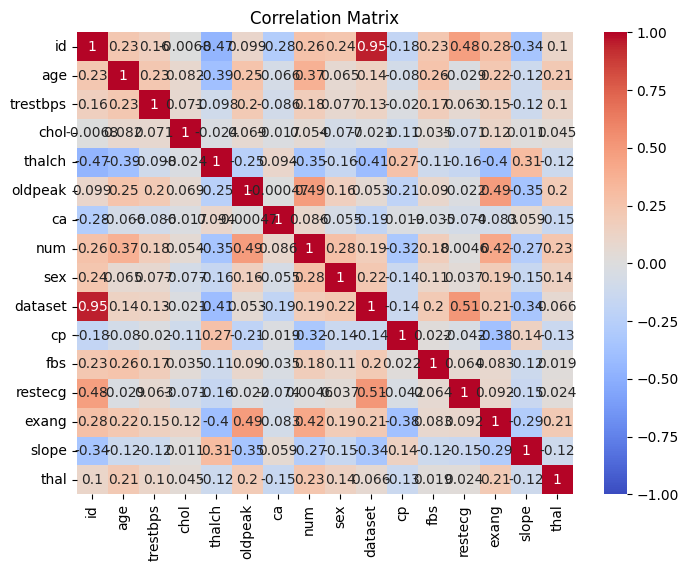

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()